   watch_time_hour genre_preference  avg_rating_given
0               13           action          2.037554
1                4           comedy          1.350365
2               15         thriller          1.359665
3               14         thriller          1.772998
4               14           comedy          1.202237
   watch_time_hour genre_preference  avg_rating_given  cluster
0               13           action          2.037554        0
1                4           comedy          1.350365        2
2               15         thriller          1.359665        1
3               14         thriller          1.772998        1
4               14           comedy          1.202237        2


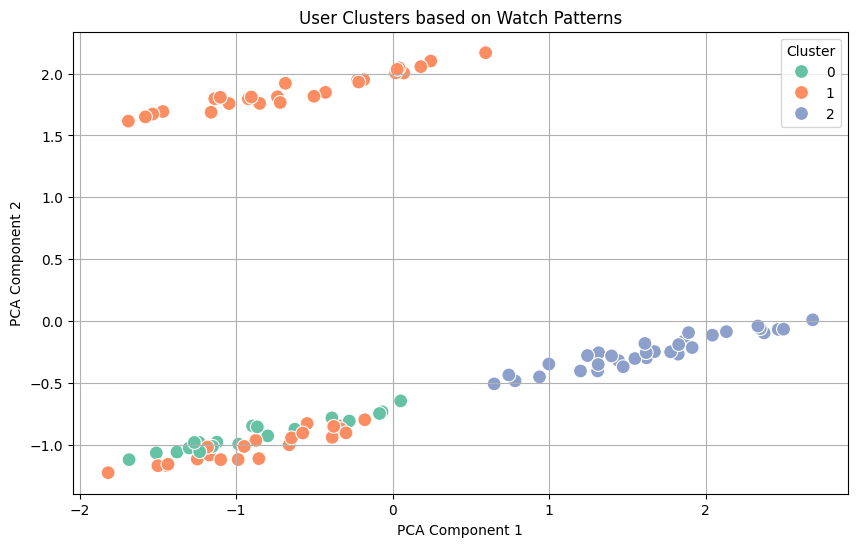

In [9]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded dataset
file_path = "movie_watch.csv"
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
print(df.head())

# One-hot encode the 'genre_preference' column
df_encoded = pd.get_dummies(df, columns=['genre_preference'])

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

# Apply KMeans clustering (let's try 3 clusters as a starting point)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Show the first few rows with cluster assignments
print(df.head())

# Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(data_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title("User Clusters based on Watch Patterns")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()